<a href="https://colab.research.google.com/github/sahil0220/Clothes-Pridiction-Using-CNN/blob/master/Clothes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Number of samples in training dataset: "+ str(len(x_train)))
print("Number of labels in training dataset: "+ str(len(y_train)))
print("Dimensions of a single image in x_train: "+ str(len(x_train[0].shape)))
print("--------------------------------------------------------------")
print("Number of samples in test dataset: "+ str(len(x_test)))
print("Number of labels in test dataset: "+ str(len(y_test)))
print("Dimensions of a single image in x_test: "+ str(len(x_test[0].shape)))

Number of samples in training dataset: 60000
Number of labels in training dataset: 60000
Dimensions of a single image in x_train: 2
--------------------------------------------------------------
Number of samples in test dataset: 10000
Number of labels in test dataset: 10000
Dimensions of a single image in x_test: 2


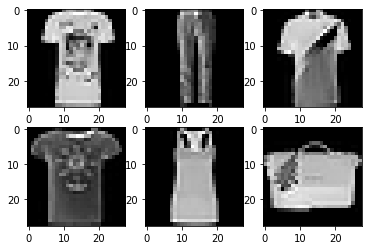

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(231)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(232)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(233)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(234)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(235)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(236)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

In [ ]:
import keras
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

batch_size=128
epochs= 100

img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

x_train=x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test=x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape=(img_rows, img_cols, 1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255 
x_test/=255

y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [ ]:
model_fitting=model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test,y_test))

score=model.evaluate(x_test, y_test, verbose=0)
print("The test loss = ", score[0])
print("The test accuracy = ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 280us/step - loss: 0.4475 - accuracy: 0.8450 - val_loss: 2.2923 - val_accuracy: 0.5150
Epoch 2/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.2852 - accuracy: 0.8999 - val_loss: 0.2685 - val_accuracy: 0.9032
Epoch 3/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.2369 - accuracy: 0.9140 - val_loss: 0.2455 - val_accuracy: 0.9126
Epoch 4/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.2070 - accuracy: 0.9261 - val_loss: 0.2434 - val_accuracy: 0.9122
Epoch 5/100
60000/60000 [==============================] - 9s 156us/step - loss: 0.1867 - accuracy: 0.9327 - val_loss: 0.2284 - val_accuracy: 0.9211
Epoch 6/100
60000/60000 [==============================] - 9s 155us/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.2194 - val_accuracy: 0.9222
Epoch 7/100
60000/60000 [==============================

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/My Drive/projects')

In [ ]:
model.save('clothing_classification_model.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img


img = load_image('shoes.jpg')

model = load_model('clothing_classification_model.h5')

class_prediction = model.predict_classes(img)
print(class_prediction[0])


if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


2
Pullover
